# Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load dataset and split into Train set and Test set

In [2]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(X_train.shape)

(80, 1)


# Visualize Dataset

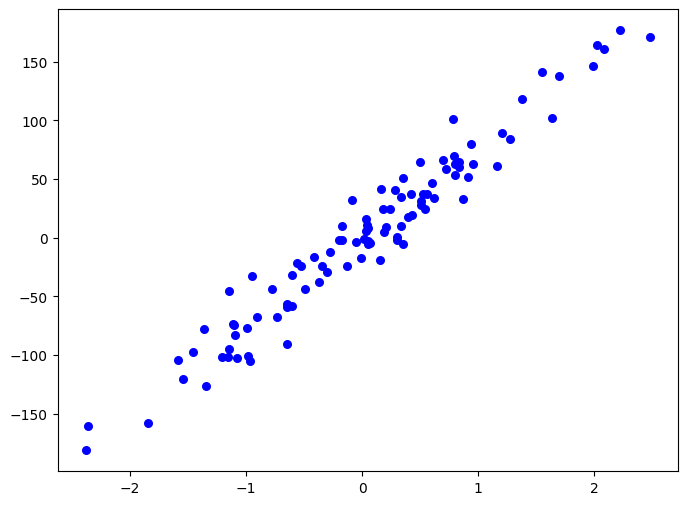

In [4]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

# Implement Linear Regression

In [19]:
class LinearRegression:
  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    #loop
    Loss = []
    for i in range(self.n_iters):
      #forward
      y_predicted = np.dot(X, self.weights) + self.bias

      #loss
      loss = (1/n_samples) * np.sum((y_predicted - y)**2)
      Loss.append(loss)

      #derivative of w, b
      dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)

      #update params
      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

    print(f'Loss per iter: {Loss}')

  def predict(self, X):
    y_predicted = np.dot(X, self.weights) + self.bias
    return y_predicted

#Inference

In [20]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predicted = linear_regression.predict(X_test)

Loss per iter: [5773.549702021132, 5762.580408721978, 5751.633281079696, 5740.708273804904, 5729.805341701718, 5718.924439667558, 5708.065522692956, 5697.228545861359, 5686.413464348935, 5675.620233424386, 5664.848808448746, 5654.099144875193, 5643.37119824886, 5632.664924206637, 5621.980278476984, 5611.317216879739, 5600.675695325932, 5590.055669817584, 5579.457096447531, 5568.879931399221, 5558.324130946539, 5547.789651453608, 5537.276449374604, 5526.784481253576, 5516.313703724241, 5505.864073509818, 5495.435547422825, 5485.028082364904, 5474.641635326628, 5464.276163387321, 5453.931623714868, 5443.607973565537, 5433.305170283788, 5423.023171302095, 5412.761934140757, 5402.521416407722, 5392.301575798398, 5382.102370095474, 5371.923757168737, 5361.765694974894, 5351.628141557385, 5341.511055046205, 5331.414393657731, 5321.338115694528, 5311.282179545178, 5301.246543684102, 5291.2311666713795, 5281.236007152566, 5271.261023858524, 5261.306175605234, 5251.371421293626, 5241.4567199094

#Evaluate on MSE function

In [21]:
def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

loss = mse(y_test, predicted)
print(loss)

1096.714686791276
